# Recommendation Engine - Spotify Project
Umesh
20220521

In [1]:
import pandas as pd

In [2]:
file = r'C:\Users\unpat\_Intellipaat\00 Live classes\2022 05 MAY\20220521 Hands-On Recommendation Spotify\spotify_data.csv'
spot = pd.read_csv(file)

In [3]:
spot.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936


In [4]:
spot.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [5]:
spot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [6]:
spot.shape

(170653, 19)

In [7]:
# pip install yellowbrick

In [8]:
import os
import datetime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Progress bar
from tqdm import tqdm

# For transformations and predictions
from scipy.optimize import curve_fit
# from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# For scoring
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score,mean_absolute_error

# For validation
from sklearn.model_selection import train_test_split

In [9]:
spot['artists'] = spot['artists'].str.replace("[","")

In [10]:
spot['artists'] = spot['artists'].str.replace("]","")

In [11]:
spot['artists'] = spot['artists'].str.replace("'","")

In [12]:
spot.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936


**Normalizing all numerical columns**

In [13]:
def normalize_column(col):
    max_d = spot[col].max()
    min_d = spot[col].min()
    spot[col] = (spot[col] - min_d) / (max_d - min_d)

In [14]:
numeric_cols = spot.select_dtypes(include = 'number') # returns all numeric columns
numeric_cols.columns

Index(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'speechiness', 'tempo'],
      dtype='object')

In [15]:
for col in numeric_cols.columns:
    normalize_column(col)
    # minmaxscalar()

**Finding the Optimal Number of Clusters**

*Elbow Curve to get the right number of Clusters*

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

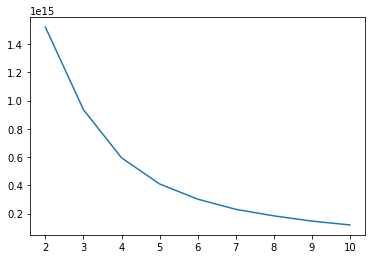

In [16]:
# Elbow-curve/SSD
# inertia
# Sum of squared distances of samples to their closest cluster center.

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
    kmeans.fit(numeric_cols)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
default_x_ticks = range(len(range_n_clusters))
plt.xticks(default_x_ticks, range_n_clusters)

plt.plot(ssd)

From the above Elbow curve, it looks like 5, 6 & 7 clusters would give best results. I would consider 6 clusters for my analysis.

In [17]:
# k-means
km = KMeans(n_clusters = 6, random_state = 42)
pred = km.fit_predict(numeric_cols)
spot['pred'] = pred
normalize_column('pred')

### Create recommendation system (using Python logic)

In [18]:
# Create recommendation system (using Python logic)

class Song_Recommender():
    """
    Neighborhood based collaborative filtering recommendation system using similarity metrics
    Manhattan distance is calculated for all songs and recommend songs that are similar to any given song
    """    
    def __init__(self, data):
        self.data_ = data

    # function which returns recommendations, we can also choose the # of songs to be recommended
    def get_recommendations(self, song_name, n_top):
        distances = []
        
        # choosing the given song_name and dropping it from the data
        song = self.data_[(self.data_.name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.name.str.lower() != song_name.lower()]
        
        for r_song in tqdm(rem_data.values):
            dist = 0

            for col in np.arange(len(rem_data.columns)):
                
                #indeces of non-numerical columns(id,Release date,name,artists)
                if not col in [3, 8, 14, 16]:
                    
                    #calculating the Manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)

        rem_data['distance'] = distances

        #sorting our data to be ascending by 'distance' feature
        rem_data = rem_data.sort_values('distance')
        columns = ['artists', 'name']

        return rem_data[columns][:n_top]

In [19]:
recommender = Song_Recommender(spot)

In [20]:
recommender.get_recommendations('Gati Bali', 6)
# recommender.get_recommendations('Gati Mrak Ati', 3)
# recommender.get_recommendations('Gati Helmus', 5)

100%|███████████████████████████████████████████████████████████████████████| 170652/170652 [00:03<00:00, 43165.51it/s]


,artists,name
20161,"Hans Pfitzner, Mitglieder der Kapelle der Staa...","Das Christelflein, Op. 20: Overture - Excerpts"
124945,"Frédéric Chopin, Alfred Cortot","Ballade No. 1 in G Minor, Op. 23"
93568,"Ludwig van Beethoven, Rudolf Serkin, Bruno Walter",Concerto No. 5 in E-Flat Major for Piano and O...
105,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,Gati Helmus
39001,"Frédéric Chopin, Vladimir Horowitz","Introduction and Rondo in E-Flat Major, Op. 16..."
41580,"Richard Wagner, Arturo Toscanini",Act II: Forest Murmurs


In [21]:
# --- END ---